<a href="https://colab.research.google.com/github/sollunium/python-basic/blob/main/mini%20Project%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import random
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [22]:
def dfset():
   df = 'https://raw.githubusercontent.com/negojovanovich3/pythonprojects/main/diabetic_data.csv'

   df = pd.read_csv(df, na_values= ['?'], low_memory= False)

   return df

In [23]:
def replacegender(cols):
   Gender = cols[0]
   sex = ['Male', 'Female']

   if Gender == 'Unknown/Invalid':
      Gender = random.choice(sex)
      return Gender

   else:
      return Gender

In [24]:
def changeage(cols):
   age = cols[0]
   list = re.findall('[0-9]+', age)
   y= 0

   for x in list:
      y += int(x)

   y /= 2

   return y


In [25]:
def extractnum(cols):
   num = cols[0].lstrip('vV><E')
   num.rstrip('vV><E')

   return float(num)

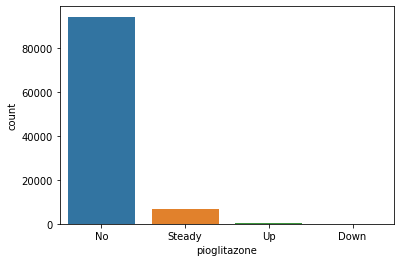

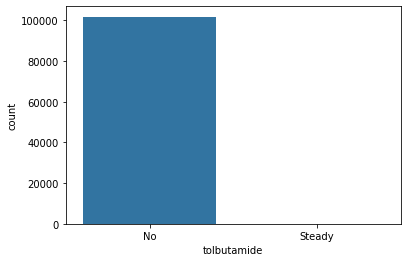

In [26]:
df = dfset() # Get value from csv

sns.countplot(data= df, x= 'pioglitazone')
plt.show()
sns.countplot(data=df, x='tolbutamide')

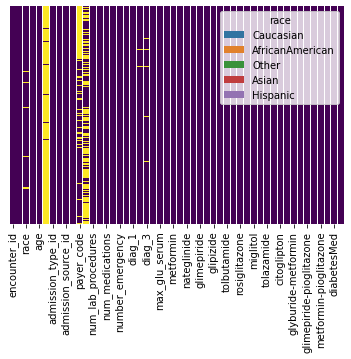

In [19]:

sns.barplot(data= df, x= 'gender', y= 'admission_source_id', hue = 'race', )
sns.heatmap(df.isna(), yticklabels=False,cbar=False,cmap='viridis', )
plt.show()



In [27]:
df.drop(['encounter_id', 'patient_nbr', 'tolbutamide'], axis=1, inplace=True) # Drop unnecessary value
df.drop(['weight','payer_code'],axis=1, inplace=True)

df = df.replace(to_replace=['None','No'], value='0') # Replace None or No value into 0
df = df.replace(to_replace=['Yes','Ch', 'Steady'], value='1') # Replace Yes into 1
df.dropna(inplace=True) # Drop Null

In [28]:
# gender concat
df['gender'] = df[['gender']].apply(replacegender, axis= 1)
gender = pd.get_dummies(df['gender'], drop_first=True)
df = pd.concat([df,gender], axis= 1)
df.drop('gender', axis= 1, inplace = True)

# race concat
race = pd.get_dummies(df['race'], drop_first=True)
df = pd.concat([df,race], axis= 1)
df.drop('race', axis= 1, inplace = True)

# insulin concat
insulin = pd.get_dummies(df['insulin'], drop_first=True)
df = pd.concat([df,insulin], axis= 1)
df.drop('insulin', axis= 1, inplace = True)

# medical_specialty concat
medical_specialty = pd.get_dummies(df['medical_specialty'], drop_first=True)
df = pd.concat([df,medical_specialty], axis= 1)
df.drop('medical_specialty', axis= 1, inplace = True)

# change age
df['age'] = df[['age']].apply(changeage,axis=1)
# print(df)


In [ ]:
# df['diag_1'] = df[['diag_1']].apply(extractnum, axis=1)
# df['diag_2'] = df[['diag_2']].apply(extractnum, axis=1)
# df['diag_3'] = df[['diag_3']].apply(extractnum, axis=1)
# df['A1Cresult'] = df[['A1Cresult']].apply(extractnum, axis=1)
# df['max_glu_serum'] = df[['max_glu_serum']].apply(extractnum, axis=1)

In [29]:
# diag_1 concat
diag_1 = pd.get_dummies(df['diag_1'], drop_first=True)
df = pd.concat([df,diag_1], axis= 1)
df.drop('diag_1', axis= 1, inplace = True)

# diag_2 concat
diag_2 = pd.get_dummies(df['diag_2'], drop_first=True)
df = pd.concat([df,diag_2], axis= 1)
df.drop('diag_2', axis= 1, inplace = True)

#
# # diag_3 concat
diag_3 = pd.get_dummies(df['diag_3'], drop_first=True)
df = pd.concat([df,diag_3], axis= 1)
df.drop('diag_3', axis= 1, inplace = True)

In [30]:
ls = [
  "max_glu_serum", "A1Cresult", "metformin","repaglinide",
  "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide",
  "glipizide", "glyburide", "pioglitazone", "rosiglitazone",
  "acarbose", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton",
  "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone",
  "metformin-rosiglitazone", "metformin-pioglitazone", "change", "diabetesMed"
]


for x in ls:
  a = pd.get_dummies(df[x], drop_first=True)
  df = pd.concat([df, a], axis=1)
  df.drop (x, axis = 1, inplace= True)


df.replace(to_replace=['>30'], value= 'NO', inplace=True) # to make same as No and >30
readmitted = df['readmitted']
df.drop('readmitted', axis=1, inplace= True)

print(df)

X= df
y= readmitted


         age  admission_type_id  discharge_disposition_id  ...  1  1  1
9       95.0                  3                         3  ...  0  1  1
12      45.0                  1                         3  ...  0  1  1
13      85.0                  1                         6  ...  0  0  1
17      55.0                  1                         1  ...  0  0  1
26      85.0                  1                         3  ...  0  1  1
...      ...                ...                       ...  ... .. .. ..
101735  75.0                  2                         6  ...  0  1  1
101743  85.0                  1                        13  ...  0  1  1
101747  75.0                  1                        22  ...  0  0  1
101749  75.0                  3                         6  ...  0  1  1
101764  85.0                  2                         3  ...  0  1  1

[49735 rows x 2121 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[[   21  1583]
 [   32 13285]]
              precision    recall  f1-score   support

         <30       0.40      0.01      0.03      1604
          NO       0.89      1.00      0.94     13317

    accuracy                           0.89     14921
   macro avg       0.64      0.51      0.48     14921
weighted avg       0.84      0.89      0.84     14921



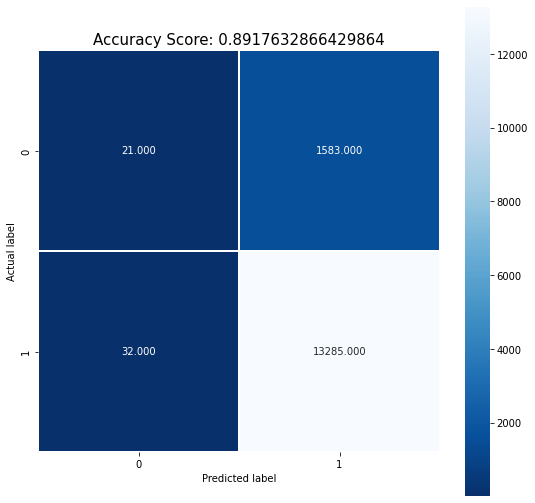

In [31]:
  # Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
logmodel = LogisticRegression(max_iter=100)
logmodel.fit(X_train, y_train)
predict = logmodel.predict(X_test)
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logmodel.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

              precision    recall  f1-score   support

         <30       0.29      0.00      0.00      1090
          NO       0.89      1.00      0.94      8857

    accuracy                           0.89      9947
   macro avg       0.59      0.50      0.47      9947
weighted avg       0.82      0.89      0.84      9947



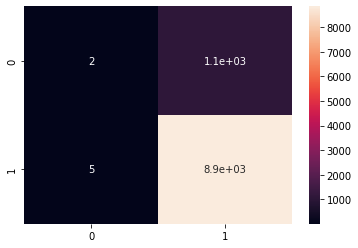

In [33]:
# Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)
randomforest_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
randomforest_classifier.fit(X_train, y_train)

y_predict = randomforest_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict))